# Kalman Filter

KalmanFilter 클래스는 다음과 같은 동적 선형 모형 수식을 가정하고 있다.
$$
\alpha_𝑡=𝑇_𝑡\alpha_{𝑡-1} + c_t + R_t\eta_t \\
y_t = Z_t\alpha_t + d_t + \varepsilon_t
$$
* $\alpha_𝑡$  : 상태 벡터 <br>
* T  : transition matrix<br>
* c  : state intercept vector<br>
* R  : selection matrix<br>
* $\eta_t∼N(0,Q_t)$  : 이노베이션 과정 벡터<br>
* Q  : state covariance matrix<br>
* $𝑦_𝑡$  : 관측 벡터<br>
* Z  : design matrix<br>
* d  : observation intercept vector<br>
* $𝜀_𝑡∼𝑁(0,𝐻_𝑡)$  : 관측 잡음 벡터<br>
* H  : observation covariance matrix<br>

<hr>
클래스 생성을 위한 입력 인수 목록은 다음과 같다.

 Arguments | Description 
 :---------: | :------------
 `k_endog` | 정수 혹은 배열. 배열인 경우에는 칼만필터를 적용할 실제 시계열 자료. 정수인 경우에는 출력 변수의 수 
 `k_states` | 정수. 상태 변수의 수 
 `k_posdef` | (옵션) 정수. 출력 잡음의 공분산 중 양 한정(positive definite)을 보장하는 차원의 수. 디폴트는 k_states.
 `transition` |  (옵션) 상태 전이 행렬(transition matrix). 디폴트는 0.
 `state_intercept` | (옵션) 상태 전이식의 절편(intercept for the transition equation). 디폴트는 0.
 `selection` | (옵션) 이노베이션 과정에 대한 선택 행렬(selection matrix). 디폴트는 0.
 `state_cov` | (옵션) 이노베이션 과정의 공분산 행렬. 디폴트는 0.
 `design` | (옵션) 설계 행렬(design matrix). 디폴트는 0.
 `obs_intercept` |  (옵션) 관측식의 절편(intercept for the observation equation). 디폴트는 0.
 `obs_cov` | 	(옵션) 관측 행렬의 공분산 행렬. 디폴트는 0.
 `initial_state` | (옵션) 배열. 초기 상태 변수 값
 `initialization` | (옵션) 다음 문자열 중 하나 {approximate_diffuse, stationary, known} (옵션) 상태 변수 초기화 방법
 `initial_variance` | (옵션) 실수. 초기화 방법이 approximate_diffuse 일 경우의 초기 분산 값. 디폴트는 1e6.
 `initial_state_cov	` | (옵션) 배열. 초기화 방법이 `known` 일 경우 사용하는 분산 행렬
 `nobs` | (옵션) 정수. `k_endog`가 정수인 경우에 시계열 자료의 길이를 표시.
 `loglikelihood_burn` | (옵션) 정수. log-likelihood를 기록하지 않는 burn-in 구간의 길이. 디폴트는 0
 `tolerance` | 	(옵션) 실수. 상태변수의 수렴 기준. 디폴트는 1e-19.


<hr>

## Attributes
`KalmanFilter` 클래스는 다음과 같은 속성을 가진다.

속성 | 자료형 | 의미
-- | -- | --
`dtype` | numpy.dtype | 자료형
`obs` | Array | 관측 시계열의 값
`endog` | Array | 관측 시계열의 값
`time_invariant` | Boolean | 상태 모형 모수들이 시간에 따라 변화하는가의 여부
`design` | Array | 입력시 지정값
`obs_cov` | Array | 입력시 지정값
`obs_intercept` | Array | 입력시 지정값
`selection` | Array | 입력시 지정값
`state_cov` | Array | 입력시 지정값
`state_intercept` | Array | 입력시 지정값
`transition` | Array | 입력시 지정값

## Method
`KalmanFilter` 클래스에서 많이 사용되는 메서드 목록은 다음과 같다.

메서드 | 기능
 --- | ---
`simulate` | 모수가 모두 충족된 경우 시뮬레이션 수행
`initialize_known` | 초기 상태 생성 (상태값을 아는 경우)
`initialize_stationary` | 초기 상태 생성 (정상 상태)
`initialize_approximate_diffuse` | 초기 상태 생성
`filter` | 필터링. `FilterResults` 객체 출력

<hr>

# Example

예를 들어 다음과 같은 로컬 레벨 모형의 경우,
$$
𝜇_𝑡 = 𝜇_{𝑡−1} + 𝑤_𝑡 \quad, \qquad 𝑤_𝑡∼𝑁(𝜇=0, 𝜎^2=10) \\
𝑌_𝑡 = 𝜇_𝑡 + 𝑣_𝑡 \quad, \qquad 𝑣_𝑡∼𝑁(𝜇=0,𝜎^2=100)
$$
 
다음 코드와 같이 모형을 생성하고 시뮬레이션 할 수 있다.

In [1]:
from statsmodels.tsa.statespace.kalman_filter import KalmanFilter

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

path = '/home/hahnz/NanumGothicBold.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

/usr/local/lib/python3.5/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


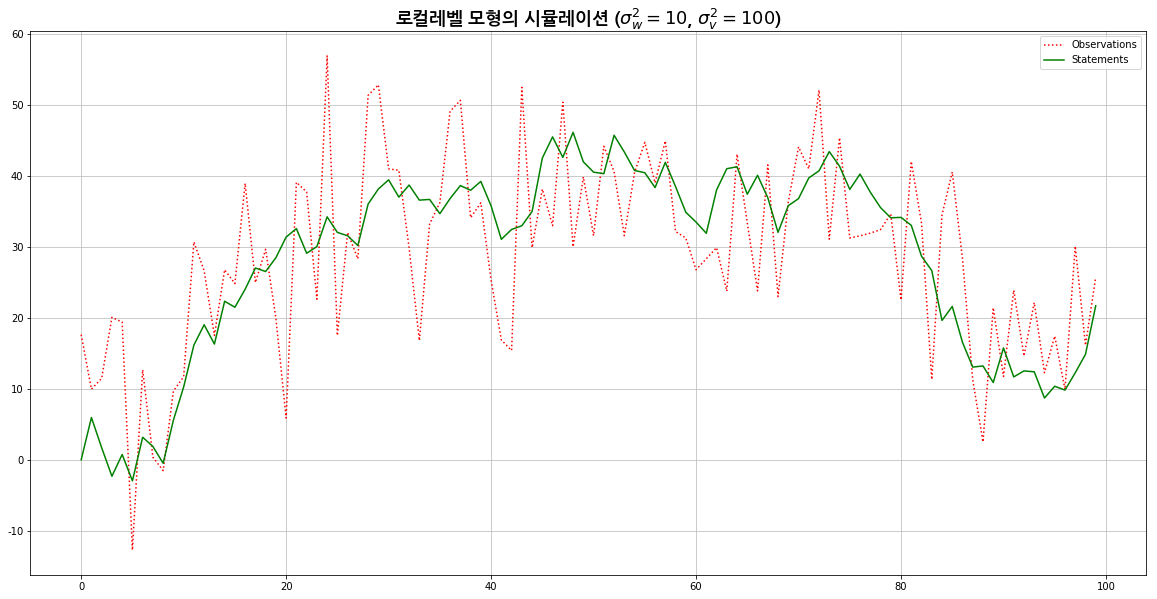

In [2]:
model1 = KalmanFilter(k_endog=1, k_states=1,
                      transition=[[1]], selection=[[1]], state_cov=[[10]],
                      design=[[1]], obs_cov=[[100]])

np.random.seed(0)
y1, x1 = model1.simulate(100)

plt.rcParams["figure.figsize"] = (20,10)
plt.plot(y1, 'r:', label="Observations")
plt.plot(x1, 'g-', label="Statements")
plt.legend()
plt.title("로컬레벨 모형의 시뮬레이션 ($\sigma_w^2 = 10$, $\sigma_v^2 = 100$)", fontproperties=fontprop)
plt.grid(b=True, which='major',c='silver')
plt.show()

만약 시뮬레이션이 아니라 실제 시계열(관측값)을 필터링하여 상태값을 추정하는 것이 목적이라면 다음과 같이 관측된 시계열을 넣어 모형을 생성한다.

In [3]:
model2 = KalmanFilter(y1, k_states=1,
                      transition=[[1]], selection=[[1]], state_cov=[[10]],
                      design=[[1]], obs_cov=[[100]])

시뮬레이션 방법은 위에서 보였다. 필터링의 경우에는 `filter` 메서드를 실행하기에 앞서 `initialize_xxxx` 메소드들로 초기 상태를 생성해야 한다.
추정이 완료되면 `filtered_state` 속성에 추정된 상태값이 저장된다.

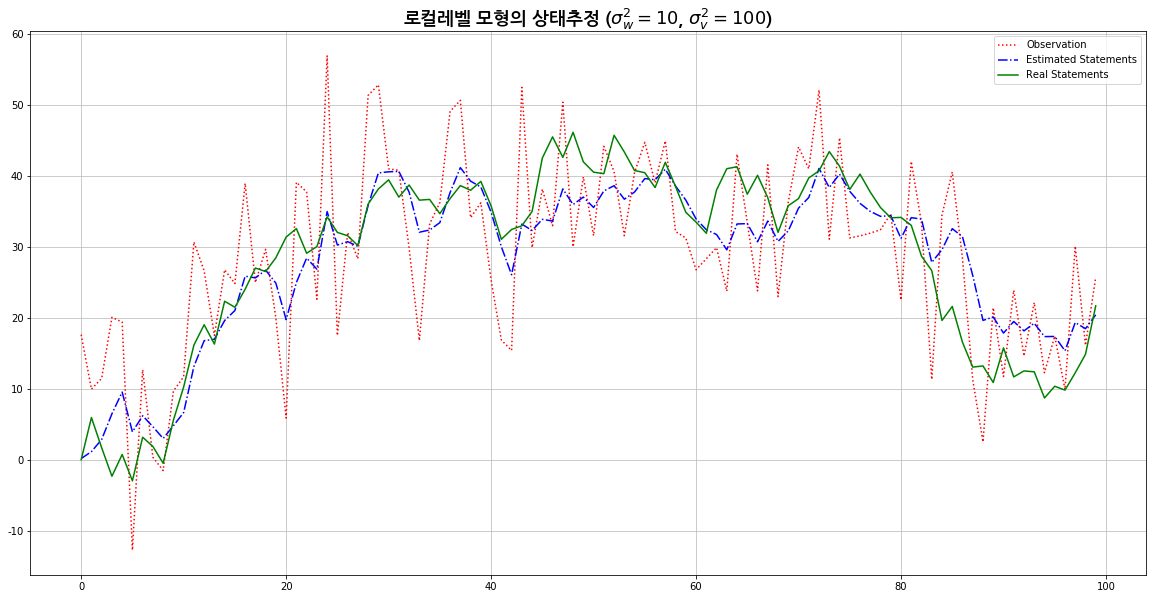

In [5]:
model2.initialize_known([0], [[1]])
result2 = model2.filter()

plt.plot(model2.obs[0], 'r:', label="Observation")
plt.plot(result2.filtered_state[0], "b-.", label="Estimated Statements")
plt.plot(x1, "g-", label="Real Statements")
plt.legend()
plt.title("로컬레벨 모형의 상태추정 ($\sigma_w^2 = 10$, $\sigma_v^2 = 100$)", fontproperties=fontprop)
plt.grid(b=True, which='major',c='silver')
plt.show()